In [1]:
import EddyDetectionV2 as eddy
import oceanspy as ospy
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.colors import Normalize
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
from matplotlib.colors import SymLogNorm
import matplotlib.patheffects as pe
from tqdm import tqdm
import ast
from matplotlib.animation import FuncAnimation, FFMpegFileWriter
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

# Set default font size to match LaTeX document
plt.rcParams.update({
    'font.size': 11,       # Default text size
    'axes.titlesize': 10,  # Title size
    'axes.labelsize': 10,  # Axis label size
    'xtick.labelsize': 8, # X-tick label size
    'ytick.labelsize': 8, # Y-tick label size
    'legend.fontsize': 8, # Legend font size
    'figure.titlesize': 12 # Figure title size
})

In [2]:
dfOWsurf = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/Eddies_fullYear.nc')['EddyDetection']

In [3]:
FWC = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/FWC_full_domain.nc')['__xarray_dataarray_variable__'].sel(Y=slice(70,75)).sel(X=slice(-22,2))
FWC = FWC.resample(time='D').mean(dim='time')

In [4]:
locMax_surf = pd.read_csv('/nird/projects/NS9608K/MSc_EK/Data/EddyResults/Tracking/locMAX.csv')
locMin_surf = pd.read_csv('/nird/projects/NS9608K/MSc_EK/Data/EddyResults/Tracking/locMin.csv')

display(locMax_surf,locMin_surf)

,Time,ID,Latitude,Longitude
0,0,['1'],71.079446,-9.051356
1,0,['2'],71.241831,-14.804034
2,0,['3'],71.278327,-10.910303
3,0,['4'],71.370250,-2.622462
4,0,['5'],71.444517,-8.921229
...,...,...,...,...
12422,364,['3140'],72.949224,-6.374665
12423,364,['3170'],73.281687,-17.847658
12424,364,['3156'],73.330735,-15.751358
12425,364,['3196'],73.430090,-12.556844


,Time,ID,Latitude,Longitude
0,0,['3197'],71.079446,-10.219283
1,0,['3198'],71.151252,-12.122169
2,0,['3199'],71.187372,-13.562805
3,0,['3200'],71.296632,-7.875797
4,0,['3201'],71.463188,-15.163024
...,...,...,...,...
12945,364,['7475'],72.655819,-6.552864
12946,364,['7446'],72.834750,-17.704486
12947,364,['7460'],72.834750,-8.399612
12948,364,['7476'],73.233045,-6.419260


In [5]:
display(locMax_surf)
IDs = [X[1] for X in locMax_surf.values]
print(IDs)

,Time,ID,Latitude,Longitude
0,0,['1'],71.079446,-9.051356
1,0,['2'],71.241831,-14.804034
2,0,['3'],71.278327,-10.910303
3,0,['4'],71.370250,-2.622462
4,0,['5'],71.444517,-8.921229
...,...,...,...,...
12422,364,['3140'],72.949224,-6.374665
12423,364,['3170'],73.281687,-17.847658
12424,364,['3156'],73.330735,-15.751358
12425,364,['3196'],73.430090,-12.556844


["['1']", "['2']", "['3']", "['4']", "['5']", "['6']", "['7']", "['8']", "['9']", "['10']", "['11']", "['12']", "['13']", "['14']", "['15']", "['16']", "['17']", "['18']", "['19']", "['20']", "['21']", "['22']", "['23']", "['24']", "['25']", "['26']", "['27']", "['28']", "['1']", "['29']", "['2']", "['5']", "['6']", "['8']", "['4']", "['9']", "['12']", "['13']", "['30']", "['16']", "['17']", "['18']", "['19']", "['20']", "['21']", "['23']", "['31']", "['32']", "['33']", "['34']", "['26']", "['35']", "['36']", "['37']", "['1']", "['38']", "['2']", "['3']", "['39']", "['5']", "['6']", "['8']", "['9']", "['12']", "['40']", "['17']", "['41']", "['30']", "['18']", "['19']", "['20']", "['23']", "['42']", "['43']", "['32']", "['44']", "['33']", "['27']", "['26']", "['36']", "['35']", "['37']", "['40']", "['2']", "['30']", "['49']", "['12']", "['8']", "['6']", "['42']", "['48']", "['39']", "['5']", "['1']", "['26']", "['50']", "['17a']", "['17b']", "['27']", "['4']", "['43']", "['3']", "['37']

In [6]:
display(len(np.unique(locMax_surf['Time'].values)),np.unique(locMax_surf['Time'].values))
display(locMax_surf[6450:6600])

365

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

,Time,ID,Latitude,Longitude
6450,181,['1667'],72.611856,-6.819280
6451,181,['1819'],72.633800,-11.905291
6452,181,['1830'],72.677913,-11.126342
6453,181,"['1324ab', '1324bb']",72.722330,-8.356052
6454,181,['1811'],72.789542,-13.782931
...,...,...,...,...
6595,185,['1816'],71.806927,-5.111922
6596,185,['1796'],71.826476,-8.050681
6597,185,['1773b'],71.865728,-13.036724
6598,185,"['1227cb', '1227bb']",71.885431,-10.392037


In [7]:
def convert_to_list(input_string):
    try:
        data = ast.literal_eval(input_string)
        data = [int(X) for X in data]
        return data
    except (ValueError, SyntaxError):
        return [input_string]

def convert_to_list_str(input_string):
    try:
        data = ast.literal_eval(input_string)
        return data
    except (ValueError, SyntaxError):
        return [input_string]
    

ID = locMin_surf['ID'].values
ID_min = [convert_to_list(ids) if isinstance(ids, str) else [(int(ids))] for ids in ID]
IDs_not_int_min = [X if isinstance(X[0],str) else None for X in ID_min]
IDs_int_min = []
for IDS in ID_min:
    if len(IDS) == 1:
        try:
            IDs_int_min.append(int(IDS[0]))
        except:
            pass

ID = locMax_surf['ID'].values
ID_max = [convert_to_list(ids) if isinstance(ids, str) else [(int(ids))] for ids in ID]
IDs_not_int_max = [X if isinstance(X[0],str) else None for X in ID_max]
IDs_int_max = []
for IDS in ID_max:
    if len(IDS) == 1:
        try:
            IDs_int_max.append(int(IDS[0]))
        except:
            pass


display(np.unique(IDs_int_max),len(np.unique(IDs_int_max)))
display(np.unique(IDs_int_min),len(np.unique(IDs_int_min)))
print(len(np.unique(IDs_int_max))+len(np.unique(IDs_int_min)))
maximum_ID_num = np.max(np.unique(IDs_int_min))

IDs_not_int_max_fin = []
for i in IDs_not_int_max:
    if i is not None:
        IDs_not_int_max_fin.append(convert_to_list_str(i[0]))

IDs_not_int_min_fin = []
for i in IDs_not_int_min:
    if i is not None:
        IDs_not_int_min_fin.append(convert_to_list_str(i[0]))

print(len(locMax_surf)+len(locMin_surf))
display(IDs_not_int_max_fin,IDs_not_int_min_fin)

array([   1,    2,    3, ..., 3194, 3195, 3196])

3196

array([3197, 3198, 3199, ..., 7492, 7493, 7494])

4298

7494
25377


[['17a'],
 ['17b'],
 ['13a'],
 ['13b'],
 ['13a'],
 ['5a'],
 ['5b'],
 ['13b'],
 ['12a'],
 ['12b'],
 ['5a'],
 ['5ba'],
 ['5bb'],
 ['46a'],
 ['46b'],
 ['13b'],
 ['5a'],
 ['5ba', '5bb'],
 ['12b', '12a'],
 ['5a'],
 ['5ba', '5bb'],
 ['12b', '12a'],
 ['13b'],
 ['5ba', '5bb'],
 ['12b', '12a'],
 ['13b'],
 ['102a'],
 ['102b'],
 ['6a'],
 ['6b'],
 ['12b', '12a'],
 ['5a'],
 ['5ba', '5bb'],
 ['13b'],
 ['12ba', '12aa'],
 ['12bb', '12ab'],
 ['102a', '102b'],
 ['5ba', '5bb'],
 ['13b'],
 ['6b'],
 ['102a', '102b'],
 ['12ba', '12aa'],
 ['5ba', '5bb'],
 ['13ba'],
 ['13bb'],
 ['12bb', '12ab'],
 ['6b'],
 ['5ba', '5bb'],
 ['6b'],
 ['12ba', '12aa'],
 ['13bb', '13ba'],
 ['13bb', '13ba'],
 ['102a', '102b'],
 ['12ba', '12aa'],
 ['5baa', '5bba'],
 ['5bab', '5bbb'],
 ['6b'],
 ['6b'],
 ['5bba', '5baa'],
 ['12ba', '12aa'],
 ['13bb', '13ba'],
 ['102a', '102b'],
 ['5baa', '5bba'],
 ['12ba', '12aa'],
 ['13bb', '13ba'],
 ['102a', '102b'],
 ['5bba', '5baa'],
 ['12ba', '12aa'],
 ['13bb', '13ba'],
 ['102a', '102b'],
 ['5baa

[['3213a'],
 ['3213b'],
 ['3207a'],
 ['3207b'],
 ['3213b'],
 ['3207a'],
 ['3207b'],
 ['3213b'],
 ['3207b'],
 ['3207b'],
 ['3207b'],
 ['3207b'],
 ['3207b'],
 ['3207b'],
 ['3207b'],
 ['3292a'],
 ['3292b'],
 ['3207b'],
 ['3239a'],
 ['3239b'],
 ['3292b'],
 ['3292b'],
 ['3207b'],
 ['3207b'],
 ['3239a'],
 ['3207b'],
 ['3376a'],
 ['3376b'],
 ['3239a'],
 ['3316a'],
 ['3316b'],
 ['3292b'],
 ['3292b'],
 ['3316a'],
 ['3316b'],
 ['3207b'],
 ['3376a'],
 ['3376b'],
 ['3207b'],
 ['3376a'],
 ['3376b'],
 ['3207b'],
 ['3386a'],
 ['3386b'],
 ['3376a'],
 ['3316b', '3316a'],
 ['3376b'],
 ['3366a'],
 ['3366b'],
 ['3366a'],
 ['3316b', '3316a'],
 ['3386b'],
 ['3386a'],
 ['3207b'],
 ['3376a'],
 ['3376b'],
 ['3366a'],
 ['3386a'],
 ['3316b', '3316a'],
 ['3207b'],
 ['3376b'],
 ['3207b'],
 ['3452a'],
 ['3452b'],
 ['3316b', '3316a'],
 ['3376b'],
 ['3324a'],
 ['3324b'],
 ['3207b'],
 ['3316ba', '3316aa'],
 ['3316bb', '3316ab'],
 ['3376b'],
 ['3324a'],
 ['3324a'],
 ['3316aa', '3316ba'],
 ['3207b'],
 ['3376b'],
 ['3452

In [8]:
eddies_ID_max_t_surf = locMax_surf.set_index(['Time'])
eddies_ID_min_t_surf = locMin_surf.set_index(['Time'])

In [9]:
import re

def extract_parts(s):
    match = re.match(r'(\d+)([a-zA-Z]+)', s)
    if match:
        return [int(match.group(1)), match.group(2)]
    else:
        return [int(s),0]


ID_in_time = [[] for X in np.arange(maximum_ID_num)]

for i in range(0,365):
    eddyMax_ID = eddies_ID_max_t_surf.at[i,'ID'].values
    eddyMax_Lon = eddies_ID_max_t_surf.at[i,'Longitude'].values
    eddyMax_Lat = eddies_ID_max_t_surf.at[i,'Latitude'].values
    originIDs = [[[],[],[],[],[],[]] for X in range(len(eddyMax_ID))]
    for j,ID in enumerate(eddyMax_ID):
        ID = ast.literal_eval(ID)
        for IDS in ID:
            data = extract_parts(IDS)
            originIDs[j][0].append(data[0])
            originIDs[j][1].append(data[1])
        originIDs[j][2].append(eddyMax_Lon[j])
        originIDs[j][3].append(eddyMax_Lat[j])
        originIDs[j][4].append(i)
        originIDs[j][5].append(0)
    
    for IDS in originIDs:
        for subIDS in IDS[0]:
            ID_in_time[subIDS-1].append(IDS)
    
    eddyMin_ID = eddies_ID_min_t_surf.at[i,'ID'].values
    eddyMin_Lon = eddies_ID_min_t_surf.at[i,'Longitude'].values
    eddyMin_Lat = eddies_ID_min_t_surf.at[i,'Latitude'].values
    originIDs = [[[],[],[],[],[],[]] for X in range(len(eddyMin_ID))]
    for j,ID in enumerate(eddyMin_ID):
        ID = ast.literal_eval(ID)
        for IDS in ID:
            data = extract_parts(IDS)
            originIDs[j][0].append(data[0])
            originIDs[j][1].append(data[1])
        originIDs[j][2].append(eddyMin_Lon[j])
        originIDs[j][3].append(eddyMin_Lat[j])
        originIDs[j][4].append(i)
        originIDs[j][5].append(1)
    
    for IDS in originIDs:
        for subIDS in IDS[0]:
            ID_in_time[subIDS-1].append(IDS)


eddy_duration = []
eddy_duration_max = []
eddy_duration_min = []
for eddy in ID_in_time:
    try:
        eddy_duration.append(int(eddy[-1][-2][0]-eddy[0][-2][0]+1))
        if eddy[0][-1][0] == 0:
            eddy_duration_max.append(int(eddy[-1][-2][0]-eddy[0][-2][0]+1))
        elif eddy[0][-1][0] == 1:
            eddy_duration_min.append(int(eddy[-1][-2][0]-eddy[0][-2][0]+1))
        else:
            print('Error')
    except:
        print(eddy,'Error')
print('Max:',np.max(eddy_duration))

display(len(eddy_duration_max))

Max: 178


3196

In [10]:
import json

display(ID_in_time[1978][0],ID_in_time[1978][-1])

with open('/nird/projects/NS9608K/MSc_EK/Data/EddyResults/Tracking/ID_in_time.json', 'w') as f:
    json.dump(ID_in_time, f)

[[1979], [0], [-12.165578744999994], [72.65581885499999], [195], [0]]

[[1979, 2472, 1979, 1979, 1979, 1979, 1979, 1979, 2472, 1979],
 ['aabbba',
  'a',
  'abbbbb',
  'aabbbb',
  'babbbb',
  'abbbba',
  'babbba',
  'bbbbbb',
  'b',
  'bbbbba'],
 [-10.867105779999994],
 [71.18737249499999],
 [364],
 [0]]

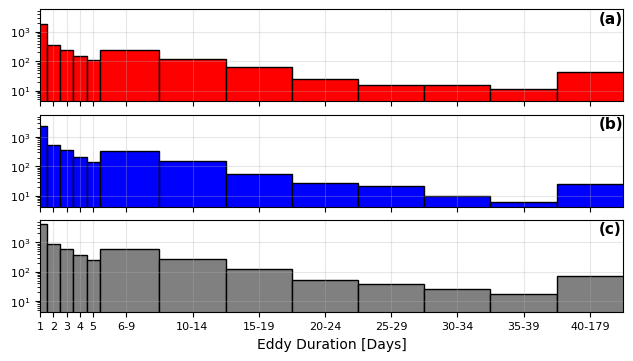

In [11]:
fig, ax = plt.subplots(3,1,sharex=True,sharey=True,
    figsize=(6.2217,3.5), layout='constrained'
)
ax[0].hist(eddy_duration_max,bins=[0,1.5,2.5,3.5,4.5,5.5,10,15,20,25,30,35,40,179],range=(1, max(eddy_duration)),log=True,edgecolor='k',color='r')

ax[0].grid(alpha=0.3)

ax[1].hist(eddy_duration_min,bins=[0,1.5,2.5,3.5,4.5,5.5,10,15,20,25,30,35,40,179],range=(1, max(eddy_duration)),log=True,edgecolor='k',color='b')

ax[1].grid(alpha=0.3)

ax[2].hist(eddy_duration,bins=[0,1.5,2.5,3.5,4.5,5.5,10,15,20,25,30,35,40,179],range=(1, max(eddy_duration)),log=True,edgecolor='k',color='grey')
ax[2].set_xlim(1,45)
ax[2].set_xlabel('Eddy Duration [Days]')
ax[2].grid(alpha=0.3)
ax[2].set_xticks([1,2,3,4,5,7.5,12.5,17.5,22.5,27.5,32.5,37.5,42.5])
ax[2].set_xticklabels([1,2,3,4,5,'6-9','10-14','15-19','20-24','25-29','30-34','35-39','40-179'])

ax[0].annotate('(a)',xy=[43.2,2000],fontweight='bold')
ax[1].annotate('(b)',xy=[43.2,2000],fontweight='bold')
ax[2].annotate('(c)',xy=[43.2,2000],fontweight='bold')

fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyDurationHist',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

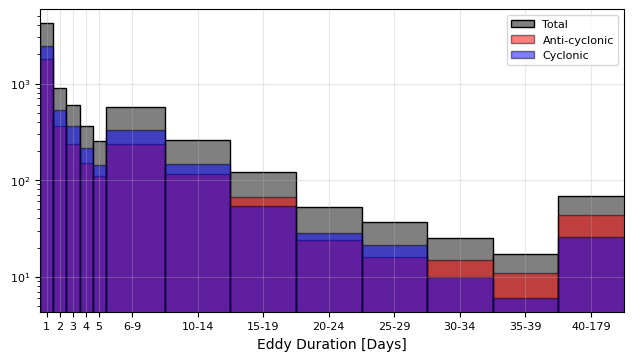

In [12]:
fig, ax = plt.subplots(
    figsize=(6.2217,3.5), layout='constrained'
)
ax.hist(eddy_duration,bins=[0.5,1.5,2.5,3.5,4.5,5.5,10,15,20,25,30,35,40,179],
        log=True,label='Total',edgecolor='k',color='grey',stacked=False,histtype='bar')
ax.hist(eddy_duration_max,bins=[0.5,1.5,2.5,3.5,4.5,5.5,10,15,20,25,30,35,40,179],
        log=True,label='Anti-cyclonic',edgecolor='k',color='r',stacked=False,histtype='bar',alpha=0.5)
ax.hist(eddy_duration_min,bins=[0.5,1.5,2.5,3.5,4.5,5.5,10,15,20,25,30,35,40,179],
        log=True,label='Cyclonic',edgecolor='k',color='b',stacked=False,histtype='bar',alpha=0.5)

ax.set_xlim(0.5,45)
ax.set_xlabel('Eddy Duration [Days]')
ax.grid(alpha=0.3)
ax.set_xticks([1,2,3,4,5,7.5,12.5,17.5,22.5,27.5,32.5,37.5,42.5])
ax.set_xticklabels([1,2,3,4,5,'6-9','10-14','15-19','20-24','25-29','30-34','35-39','40-179'])
ax.legend()


fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyDurationHist',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

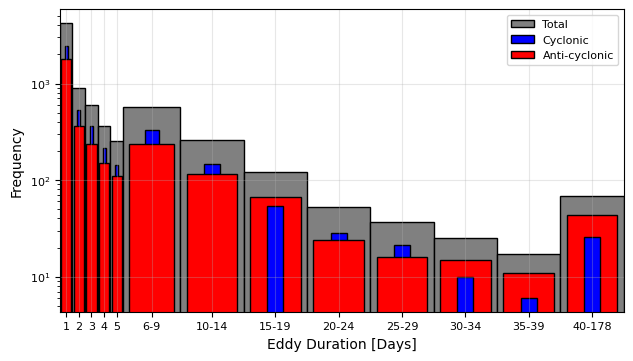

In [13]:
# Define bins
bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 10, 15, 20, 25, 30, 35, 40, 179]
positions = np.array([1, 2, 3, 4, 5, 7.75, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5])

# Calculate histograms manually
hist_total, _ = np.histogram(eddy_duration, bins)
hist_antic, _ = np.histogram(eddy_duration_max, bins)
hist_cyclo, _ = np.histogram(eddy_duration_min, bins)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6.2217, 3.5), layout='constrained')

widths = [1,1,1,1,1,4.5,5,5,5,5,5,5,5]

# Plot each bin in sorted order with dynamic width
for i in range(len(bins) - 1):
    heights = [hist_total[i], hist_antic[i], hist_cyclo[i]]
    colors = ['grey', 'red', 'blue']
    labels = ['Total', 'Anti-cyclonic', 'Cyclonic']
    
    # Sort bins by height within each bin range
    sorted_indices = np.argsort(heights)[::-1]
    
    # Plot bars for each category in sorted order within the same bin
    for idx in sorted_indices:
        if labels[idx] == 'Total':
            ax.bar(positions[i], heights[idx], width=widths[i], color=colors[idx], edgecolor='k', label=labels[idx] if (i == 0 and labels[idx] not in ax.get_legend_handles_labels()[1]) else "")
        elif labels[idx] == 'Anti-cyclonic':
            ax.bar(positions[i], heights[idx], width=widths[i] * 0.8, color=colors[idx], edgecolor='k', label=labels[idx] if (i == 0 and labels[idx] not in ax.get_legend_handles_labels()[1]) else "")
        elif labels[idx] == 'Cyclonic':
            ax.bar(positions[i], heights[idx], width=widths[i] * 0.25, color=colors[idx], edgecolor='k', label=labels[idx] if (i == 0 and labels[idx] not in ax.get_legend_handles_labels()[1]) else "")



# Set log scale for y-axis
ax.set_yscale('log')

ax.set_xlim(0.5, 45)
ax.set_xlabel('Eddy Duration [Days]')
ax.grid(alpha=0.3)

# Set the custom positions and labels for x-ticks
ax.set_xticks([1,2,3,4,5,7.75,12.5,17.5,22.5,27.5,32.5,37.5,42.5])
ax.set_xticklabels([1, 2, 3, 4, 5, '6-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-178'])
ax.set_ylabel('Frequency')

# Add the legend
handles, labels = ax.get_legend_handles_labels()
unique_labels_with_handles = {label: handle for handle, label in zip(handles, labels)}
ax.legend(unique_labels_with_handles.values(), unique_labels_with_handles.keys())

fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyDurationHist',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

In [14]:
# def is_closed_contour(vertices, tol=1e-5):
#                 distance = np.linalg.norm(vertices[0] - vertices[-1])
#                 return distance < tol


# # Process Contour Paths to Handle Jumps
# def process_contour_path(vertices, jump_threshold=0.2):
#     segments = []
#     current_segment = [vertices[0]]
    
#     for i in range(1, len(vertices)):
#         if np.linalg.norm(vertices[i] - vertices[i-1]) > jump_threshold:
#             segments.append(np.array(current_segment))
#             current_segment = [vertices[i]]
#         else:
#             current_segment.append(vertices[i])
    
#     if current_segment:
#         segments.append(np.array(current_segment))
    
#     return segments


# time_ = np.arange(180,215)
# for time in time_:
#     fig, ax = plt.subplots(
#         figsize=(12,6),layout='constrained'
#     )
#     contour = ax.contourf(dfOWsurf.X,dfOWsurf.Y,dfOWsurf[time],[0,1],colors='white')
#     ax.grid()
#     all_contour_points = []

#     for collection in contour.collections:
#         for path in collection.get_paths():
#             # Collect the vertices of the path
#             vertices = path.vertices
#             all_contour_points.append(vertices)

#     processed_contour_segments = []
#     for vertices in all_contour_points:
#         segments = process_contour_path(vertices)
#         processed_contour_segments.extend(segments)
    
#     for vertices in processed_contour_segments:
#         ax.plot(vertices[:, 0], vertices[:, 1], 'r-', linewidth=0.5)


#     data_ID = eddies_ID_max_t_surf.at[time,'ID'].values
#     data_LON = eddies_ID_max_t_surf.at[time,'Longitude'].values
#     data_LAT = eddies_ID_max_t_surf.at[time,'Latitude'].values
#     for i in range(len(data_ID)):
#         for vertices in processed_contour_segments:
#             region = Path(vertices)
#             if region.contains_point((data_LON[i],data_LAT[i])):
#                 ax.annotate(str(data_ID[i]),[data_LON[i],data_LAT[i]],fontsize=5)
    
#     contour = ax.contourf(dfOWsurf.X,dfOWsurf.Y,dfOWsurf[time],[1.5,2],colors='white')

#     all_contour_points = []

#     for collection in contour.collections:
#         for path in collection.get_paths():
#             # Collect the vertices of the path
#             vertices = path.vertices
#             all_contour_points.append(vertices)

#     processed_contour_segments = []
#     for vertices in all_contour_points:
#         segments = process_contour_path(vertices)
#         processed_contour_segments.extend(segments)
    
#     for vertices in processed_contour_segments:
#         ax.plot(vertices[:, 0], vertices[:, 1], 'b-', linewidth=0.5)

#     data_ID = eddies_ID_min_t_surf.at[time,'ID'].values
#     data_LON = eddies_ID_min_t_surf.at[time,'Longitude'].values
#     data_LAT = eddies_ID_min_t_surf.at[time,'Latitude'].values
#     for i in range(len(data_ID)):
#         for vertices in processed_contour_segments:
#             region = Path(vertices)
#             if region.contains_point((data_LON[i],data_LAT[i])):
#                 ax.annotate(str(data_ID[i]),[data_LON[i],data_LAT[i]],fontsize=5)
    
#     ax.pcolormesh(FWC.X,FWC.Y,FWC[time],cmap=cmo.haline_r,vmin=0,vmax=10)
#     ax.set_title(str(FWC.time.values[time])[0:10])

In [15]:
from pathlib import Path

def get_file_size(file_path):
    file_size_bytes = Path(file_path).stat().st_size
    if file_size_bytes < 1024:
        return f"{file_size_bytes} B"
    elif file_size_bytes < 1024**2:
        return f"{file_size_bytes / 1024:.2f} KB"
    elif file_size_bytes < 1024**3:
        return f"{file_size_bytes / 1024**2:.2f} MB"
    else:
        return f"{file_size_bytes / 1024**3:.2f} GB"

file_path = '/nird/projects/NS9608K/MSc_EK/Data/EddyResults/Tracking/EddyAreaID.nc'
print(f"File size: {get_file_size(file_path)}")

import netCDF4 as nc

# Open NetCDF file using netCDF4
ds_nc = nc.Dataset('/nird/projects/NS9608K/MSc_EK/Data/EddyResults/Tracking/EddyAreaID.nc')

# Extract variable data excluding coordinates
data_vars = {}
for var_name, nc_var in ds_nc.variables.items():
    if var_name not in ds_nc.dimensions:
        data_vars[var_name] = (nc_var.dimensions, np.array(nc_var))

# Extract coordinate data
coords = {}
for coord_name, nc_coord in ds_nc.dimensions.items():
    coords[coord_name] = np.array(ds_nc.variables[coord_name])

# Extract global attributes
attrs = {attr: ds_nc.getncattr(attr) for attr in ds_nc.ncattrs()}

# Create xarray Dataset with extracted information
ds_xr = xr.Dataset(data_vars=data_vars, coords=coords, attrs=attrs)

eddy_ID_area = ds_xr['EddyID']

File size: 2.26 GB


In [16]:
# eddy_ID_area = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/EddyResults/Tracking/EddyAreaID.nc')['EddyID']
Area_r = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/rA.nc')['rA'].sel(X=slice(-20,0),Y=slice(71,74))
display(Area_r)

<xarray.DataArray 'rA' (Y: 139, X: 435)> Size: 484kB
[60465 values with dtype=float64]
Coordinates:
  * X        (X) float64 3kB -19.97 -19.92 -19.87 ... -0.1493 -0.09658 -0.04373
  * Y        (Y) float64 1kB 71.01 71.03 71.04 71.06 ... 73.9 73.93 73.95 73.98
    XC       (Y, X) float64 484kB ...
    YC       (Y, X) float64 484kB ...
Attributes:
    description:    r-face area at cell center
    standard_name:  cell_area
    long_name:      cell area
    units:          m2
    coordinate:     YC XC

In [17]:
eddyRegion = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/Eddies_fullYear.nc')['EddyDetection'].sel(Y=slice(70,74),X=slice(-22,0))
eddyRegion.attrs = {}
eddyRegion = eddyRegion.assign_attrs(
    unit="Eddy type (1 == anti-cyclonic, 2 == cyclonic)", description="Outermost closed SSH defined eddy region"
)

In [18]:
Area = Area_r
Area_ = Area_r

In [19]:
np.unique(eddy_ID_area.isel(time=2).values)

array(['0', "['1']", "['12']", "['17']", "['18']", "['19']", "['2']",
       "['20']", "['23']", "['26']", "['27']", "['3']", "['30']",
       "['3198']", "['3199']", "['32']", "['3201']", "['3203']",
       "['3204']", "['3205']", "['3207a']", "['3207b']", "['3211']",
       "['3213b']", "['3214']", "['3215']", "['3217']", "['3218']",
       "['3221']", "['3223']", "['3225']", "['3228']", "['3230', '3231']",
       "['3235']", "['3236']", "['3237']", "['3239']", "['3240']",
       "['3243']", "['3245']", "['3246']", "['3247']", "['3248']",
       "['3249']", "['3250']", "['3251']", "['3252']", "['3253']",
       "['3254']", "['3255']", "['3256']", "['33']", "['35']", "['36']",
       "['37']", "['38']", "['39']", "['40']", "['41']", "['42']",
       "['43']", "['44']", "['5']", "['6']", "['8']", "['9']"],
      dtype=object)

In [20]:
display(eddyRegion,eddy_ID_area)

<xarray.DataArray 'EddyDetection' (time: 365, Y: 198, X: 473)> Size: 273MB
[34183710 values with dtype=float64]
Coordinates:
  * X        (X) float64 4kB -21.98 -21.93 -21.87 ... -0.1493 -0.09658 -0.04373
  * Y        (Y) float64 2kB 70.01 70.03 70.04 70.06 ... 73.9 73.93 73.95 73.98
    XC       (Y, X) float64 749kB ...
    YC       (Y, X) float64 749kB ...
  * time     (time) datetime64[ns] 3kB 2017-09-01 2017-09-02 ... 2018-08-31
    Z        float64 8B ...
Attributes:
    unit:         Eddy type (1 == anti-cyclonic, 2 == cyclonic)
    description:  Outermost closed SSH defined eddy region

<xarray.DataArray 'EddyID' (time: 365, Y: 231, X: 510)> Size: 344MB
array([[['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ...,
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0']],

       [['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ...,
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0']],

       [['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ...,
...
        ...,
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0']],

       [['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ...,
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0']],

       [['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ...,
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0']]], dtype=object)
Coordinates:
  * X        (X) float64 4kB -21.98 -21.93 -21.87 -21.82 ... 1.879 1.936 1.994
  * Y        (Y) float64 2kB 70.01 70.03 70.04 70.06 ... 74.89 74.92 74.95 74.99
  * time     (time) int64 3kB 0 1 2 3 4 5 6 7 ... 358 359 360 361 362 363 364

In [21]:
eddyDensity_AC = xr.zeros_like(eddyRegion[0],dtype=float)
eddyDensity_C = xr.zeros_like(eddyRegion[0],dtype=float)

# cond = (eddyRegion == 1)
# Area_AC = Area.where(cond)
# Area_AC = Area_AC.sum(dim=['X','Y'])
# Area_ = Area_.sum(dim=['X','Y'])

# Area = Area / Area_

# cond = (eddyRegion == 2)
# Area_AC = Area.where(cond)
# Area_AC = Area_AC.sum(dim=['X','Y'])
# Area_ = Area_.sum(dim=['X','Y'])

# Area = Area / Area_

for time in range(len(eddy_ID_area)):
    cond = (eddyRegion[time] == 1)
    update = eddyDensity_AC.where(~cond,other=eddyDensity_AC + 1)
    eddyDensity_AC = update
    cond = (eddyRegion[time] == 2)
    update = eddyDensity_C.where(~cond,other=eddyDensity_C + 1)
    eddyDensity_C = update

eddyDensity_AC = eddyDensity_AC/len(eddy_ID_area)
eddyDensity_C = eddyDensity_C/len(eddy_ID_area)



In [22]:
depth = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/Depth_res.nc')['Depth'].sel(Y=slice(70,75)).sel(X=slice(-22,2))
depth_no_nan = depth
depth = depth.where(depth > 0, np.nan)

In [23]:
eddyDensity_AC = eddyDensity_AC.where(eddyDensity_AC>0)
eddyDensity_C = eddyDensity_C.where(eddyDensity_C>0)

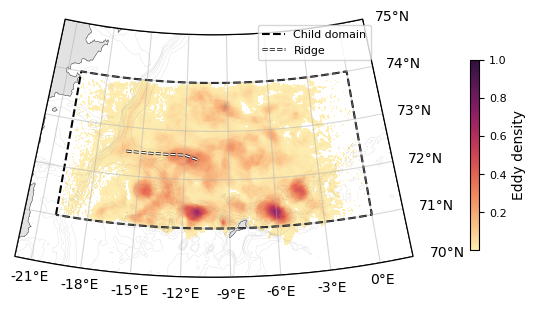

In [24]:
from matplotlib.path import Path
fig = plt.figure(
    figsize=(6.2217,3), layout = 'constrained'
)

ax = fig.add_subplot(projection=ccrs.NorthPolarStereo(central_longitude=-10))

extent = [-22+10,2+10,70,75]

mesh = ax.pcolormesh(eddyDensity_AC.X,eddyDensity_AC.Y,eddyDensity_AC,cmap=cmo.matter,vmax=1,transform=ccrs.PlateCarree())
cbar = fig.colorbar(mesh, ax=ax, shrink=0.7,pad=0.01)
cbar.set_label('Eddy density')

land = depth_no_nan.where(depth_no_nan==0)

ax.pcolormesh(land.X,land.Y,land,cmap='Greys',vmin=-25,vmax=100,zorder=0, transform=ccrs.PlateCarree())

# Define the coordinates of the box in PlateCarree projection
lon_coords = [-20, -20, 0, 0, -20]
lat_coords = [71, 74, 74, 71, 71]

# Interpolate more points along the edges of the box
num_points = 100
lon_interp = np.linspace(lon_coords[0], lon_coords[1], num_points)
lat_interp = np.linspace(lat_coords[0], lat_coords[1], num_points)

lon_interp = np.concatenate([lon_interp, np.linspace(lon_coords[1], lon_coords[2], num_points)])
lat_interp = np.concatenate([lat_interp, np.linspace(lat_coords[1], lat_coords[2], num_points)])

lon_interp = np.concatenate([lon_interp, np.linspace(lon_coords[2], lon_coords[3], num_points)])
lat_interp = np.concatenate([lat_interp, np.linspace(lat_coords[2], lat_coords[3], num_points)])

lon_interp = np.concatenate([lon_interp, np.linspace(lon_coords[3], lon_coords[4], num_points)])
lat_interp = np.concatenate([lat_interp, np.linspace(lat_coords[3], lat_coords[4], num_points)])

# Transform the interpolated coordinates to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo(central_longitude=-10)
transformed_coords = proj.transform_points(ccrs.PlateCarree(), lon_interp, lat_interp)

# Extract the transformed x and y coordinates
x_coords = transformed_coords[:, 0]
y_coords = transformed_coords[:, 1]

# Plot the transformed coordinates
ax.plot(x_coords, y_coords, color='k', linestyle='--', transform=ax.transData,label='Child domain', zorder=2)

lon = depth['XC']
lat = depth['YC']
# Add land contour
ax.contour(lon, lat, depth_no_nan, [0], colors='black', linewidths=0.25,zorder=0, transform=ccrs.PlateCarree())
ax.contour(lon, lat, depth_no_nan, [300,400,500,750,1000,1500,2000], colors='grey', linewidths=0.25,alpha=0.3, transform=ccrs.PlateCarree())

ax.plot([-16,-15,-14,-13,-12,-11],[72.5,72.5,72.5,72.5,72.5,72.4],linestyle='--',color='white',label='Ridge',linewidth=1,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()],transform=ccrs.PlateCarree())

# Create a custom path for the extent in PlateCarree projection
num_points = 100
bottom_lons = np.linspace(extent[0], extent[1], num_points)
top_lons = np.linspace(extent[1], extent[0], num_points)
bottom_lats = np.full_like(bottom_lons, extent[2])
top_lats = np.full_like(top_lons, extent[3])

# Combine the vertices
verts = np.vstack([
    np.column_stack([bottom_lons, bottom_lats]),
    np.column_stack([top_lons, top_lats])
])

# Transform the vertices to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo()
verts_proj = proj.transform_points(ccrs.PlateCarree(), verts[:, 0], verts[:, 1])
verts_proj = verts_proj[:, :2]  # Only keep x and y coordinates

# Create the path
codes = [Path.MOVETO] + [Path.LINETO] * (len(verts_proj) - 1) + [Path.CLOSEPOLY]
path = Path(np.vstack([verts_proj, verts_proj[0]]), codes)
patch = PathPatch(path, transform=ax.transData, edgecolor='black', facecolor='none')
ax.add_patch(patch)

# Set the boundary using the transformed path
ax.set_boundary(patch.get_path(), transform=ax.transData)

# Add gridlines without labels
gl = ax.gridlines(draw_labels=False,alpha=0.5)

# Manually add the labels for the bottom and right sides
xticks = np.arange(extent[0]-9, extent[1]-10 + 1, 3)  # Adjust the range and step as needed
yticks = np.arange(extent[2], extent[3] + 1, 1)  # Adjust the range and step as needed

# Add bottom labels
for xtick in xticks:
    ax.text(xtick, extent[2]-0.2, f'{xtick}°E', transform=ccrs.PlateCarree(),
            fontsize=10, ha='center', va='top')

# Add right labels
for ytick in yticks:
    ax.text(extent[1] + 1-10, ytick, f'{ytick}°N', transform=ccrs.PlateCarree(),
            fontsize=10, ha='left', va='center')


ax.legend(loc=(0.61,0.85))
######################## ax2

# ax2 = fig.add_subplot(gs[1])
# ax2.plot(Area.time,Area-Area.mean(), linewidth = 0.75)
# ax2.set_ylabel('Eddy Area Anomaly')
# ax2.set_xlabel('Time [Daily]')
# ax2.grid()


# Save the figure
fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyDensity_AC',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

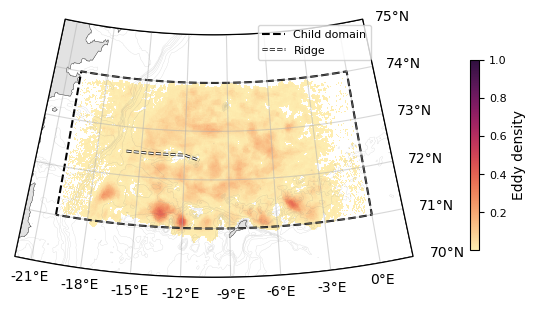

In [25]:
from matplotlib.path import Path
fig = plt.figure(
    figsize=(6.2217,3), layout = 'constrained'
)

ax = fig.add_subplot(projection=ccrs.NorthPolarStereo(central_longitude=-10))

extent = [-22+10,2+10,70,75]

mesh = ax.pcolormesh(eddyDensity_C.X,eddyDensity_C.Y,eddyDensity_C,cmap=cmo.matter,vmax=1,transform=ccrs.PlateCarree())
cbar = fig.colorbar(mesh, ax=ax, shrink=0.7,pad=0.01)
cbar.set_label('Eddy density')

land = depth_no_nan.where(depth_no_nan==0)

ax.pcolormesh(land.X,land.Y,land,cmap='Greys',vmin=-25,vmax=100,zorder=0, transform=ccrs.PlateCarree())

# Define the coordinates of the box in PlateCarree projection
lon_coords = [-20, -20, 0, 0, -20]
lat_coords = [71, 74, 74, 71, 71]

# Interpolate more points along the edges of the box
num_points = 100
lon_interp = np.linspace(lon_coords[0], lon_coords[1], num_points)
lat_interp = np.linspace(lat_coords[0], lat_coords[1], num_points)

lon_interp = np.concatenate([lon_interp, np.linspace(lon_coords[1], lon_coords[2], num_points)])
lat_interp = np.concatenate([lat_interp, np.linspace(lat_coords[1], lat_coords[2], num_points)])

lon_interp = np.concatenate([lon_interp, np.linspace(lon_coords[2], lon_coords[3], num_points)])
lat_interp = np.concatenate([lat_interp, np.linspace(lat_coords[2], lat_coords[3], num_points)])

lon_interp = np.concatenate([lon_interp, np.linspace(lon_coords[3], lon_coords[4], num_points)])
lat_interp = np.concatenate([lat_interp, np.linspace(lat_coords[3], lat_coords[4], num_points)])

# Transform the interpolated coordinates to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo(central_longitude=-10)
transformed_coords = proj.transform_points(ccrs.PlateCarree(), lon_interp, lat_interp)

# Extract the transformed x and y coordinates
x_coords = transformed_coords[:, 0]
y_coords = transformed_coords[:, 1]

# Plot the transformed coordinates
ax.plot(x_coords, y_coords, color='k', linestyle='--', transform=ax.transData,label='Child domain', zorder=2)

lon = depth['XC']
lat = depth['YC']
# Add land contour
ax.contour(lon, lat, depth_no_nan, [0], colors='black', linewidths=0.25,zorder=0, transform=ccrs.PlateCarree())
ax.contour(lon, lat, depth_no_nan, [300,400,500,750,1000,1500,2000], colors='grey', linewidths=0.25,alpha=0.3, transform=ccrs.PlateCarree())

ax.plot([-16,-15,-14,-13,-12,-11],[72.5,72.5,72.5,72.5,72.5,72.4],linestyle='--',color='white',label='Ridge',linewidth=1,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()],transform=ccrs.PlateCarree())

# Create a custom path for the extent in PlateCarree projection
num_points = 100
bottom_lons = np.linspace(extent[0], extent[1], num_points)
top_lons = np.linspace(extent[1], extent[0], num_points)
bottom_lats = np.full_like(bottom_lons, extent[2])
top_lats = np.full_like(top_lons, extent[3])

# Combine the vertices
verts = np.vstack([
    np.column_stack([bottom_lons, bottom_lats]),
    np.column_stack([top_lons, top_lats])
])

# Transform the vertices to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo()
verts_proj = proj.transform_points(ccrs.PlateCarree(), verts[:, 0], verts[:, 1])
verts_proj = verts_proj[:, :2]  # Only keep x and y coordinates

# Create the path
codes = [Path.MOVETO] + [Path.LINETO] * (len(verts_proj) - 1) + [Path.CLOSEPOLY]
path = Path(np.vstack([verts_proj, verts_proj[0]]), codes)
patch = PathPatch(path, transform=ax.transData, edgecolor='black', facecolor='none')
ax.add_patch(patch)

# Set the boundary using the transformed path
ax.set_boundary(patch.get_path(), transform=ax.transData)

# Add gridlines without labels
gl = ax.gridlines(draw_labels=False,alpha=0.5)

# Manually add the labels for the bottom and right sides
xticks = np.arange(extent[0]-9, extent[1]-10 + 1, 3)  # Adjust the range and step as needed
yticks = np.arange(extent[2], extent[3] + 1, 1)  # Adjust the range and step as needed

# Add bottom labels
for xtick in xticks:
    ax.text(xtick, extent[2]-0.2, f'{xtick}°E', transform=ccrs.PlateCarree(),
            fontsize=10, ha='center', va='top')

# Add right labels
for ytick in yticks:
    ax.text(extent[1] + 1-10, ytick, f'{ytick}°N', transform=ccrs.PlateCarree(),
            fontsize=10, ha='left', va='center')
    
ax.legend(loc=(0.61,0.85))
######################## ax2

# ax2 = fig.add_subplot(gs[1])
# ax2.plot(Area.time,Area-Area.mean(), linewidth = 0.75)
# ax2.set_ylabel('Eddy Area Anomaly')
# ax2.set_xlabel('Time [Daily]')
# ax2.grid()


# Save the figure
fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyDensity_C',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

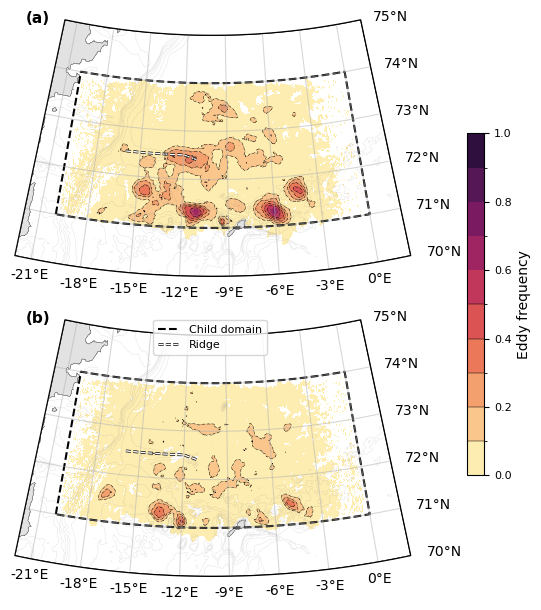

In [110]:
from matplotlib.path import Path
import matplotlib.gridspec as gridspec
fig = plt.figure(
    figsize=(6.2217,6), layout = 'constrained'
)

gs = gridspec.GridSpec(2, 1, figure=fig, height_ratios=[1, 1])

levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# Create a colormap and a normalizer for the levels
cmap = cmo.matter  # Use the cmocean 'matter' colormap
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=cmap.N, extend='neither')


ax = fig.add_subplot(gs[0, 0],projection=ccrs.NorthPolarStereo(central_longitude=-10))
ax.set_aspect('equal')
extent = [-22+10,2+10,70,75]

mesh = ax.pcolormesh(eddyDensity_AC.X,eddyDensity_AC.Y,eddyDensity_AC,cmap=cmap, norm=norm,transform=ccrs.PlateCarree())
#cbar = fig.colorbar(mesh, ax=ax, shrink=0.7,pad=0.01)
#cbar.set_label('Eddy density')

land = depth_no_nan.where(depth_no_nan==0)

ax.pcolormesh(land.X,land.Y,land,cmap='Greys',vmin=-25,vmax=100,zorder=0, transform=ccrs.PlateCarree())

# Define the coordinates of the box in PlateCarree projection
lon_coords = [-20, -20, 0, 0, -20]
lat_coords = [71, 74, 74, 71, 71]

# Interpolate more points along the edges of the box
num_points = 100
lon_interp = np.linspace(lon_coords[0], lon_coords[1], num_points)
lat_interp = np.linspace(lat_coords[0], lat_coords[1], num_points)

lon_interp = np.concatenate([lon_interp, np.linspace(lon_coords[1], lon_coords[2], num_points)])
lat_interp = np.concatenate([lat_interp, np.linspace(lat_coords[1], lat_coords[2], num_points)])

lon_interp = np.concatenate([lon_interp, np.linspace(lon_coords[2], lon_coords[3], num_points)])
lat_interp = np.concatenate([lat_interp, np.linspace(lat_coords[2], lat_coords[3], num_points)])

lon_interp = np.concatenate([lon_interp, np.linspace(lon_coords[3], lon_coords[4], num_points)])
lat_interp = np.concatenate([lat_interp, np.linspace(lat_coords[3], lat_coords[4], num_points)])

# Transform the interpolated coordinates to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo(central_longitude=-10)
transformed_coords = proj.transform_points(ccrs.PlateCarree(), lon_interp, lat_interp)

# Extract the transformed x and y coordinates
x_coords = transformed_coords[:, 0]
y_coords = transformed_coords[:, 1]

# Plot the transformed coordinates
ax.plot(x_coords, y_coords, color='k', linestyle='--', transform=ax.transData,label='Child domain', zorder=2)

lon = depth['XC']
lat = depth['YC']
# Add land contour
ax.contour(lon, lat, depth_no_nan, [0], colors='black', linewidths=0.25,zorder=0, transform=ccrs.PlateCarree())
ax.contour(lon, lat, depth_no_nan, [300,400,500,750,1000,1500,2000], colors='grey', linewidths=0.25,alpha=0.3, transform=ccrs.PlateCarree())

ax.plot([-16,-15,-14,-13,-12,-11],[72.5,72.5,72.5,72.5,72.5,72.4],linestyle='--',color='white',label='Ridge',linewidth=1,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()],transform=ccrs.PlateCarree())

# Create a custom path for the extent in PlateCarree projection
num_points = 100
bottom_lons = np.linspace(extent[0], extent[1], num_points)
top_lons = np.linspace(extent[1], extent[0], num_points)
bottom_lats = np.full_like(bottom_lons, extent[2])
top_lats = np.full_like(top_lons, extent[3])

# Combine the vertices
verts = np.vstack([
    np.column_stack([bottom_lons, bottom_lats]),
    np.column_stack([top_lons, top_lats])
])

# Transform the vertices to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo()
verts_proj = proj.transform_points(ccrs.PlateCarree(), verts[:, 0], verts[:, 1])
verts_proj = verts_proj[:, :2]  # Only keep x and y coordinates

# Create the path
codes = [Path.MOVETO] + [Path.LINETO] * (len(verts_proj) - 1) + [Path.CLOSEPOLY]
path = Path(np.vstack([verts_proj, verts_proj[0]]), codes)
patch = PathPatch(path, transform=ax.transData, edgecolor='black', facecolor='none')
ax.add_patch(patch)

# Set the boundary using the transformed path
ax.set_boundary(patch.get_path(), transform=ax.transData)

# Add gridlines without labels
gl = ax.gridlines(draw_labels=False,alpha=0.5)

# Manually add the labels for the bottom and right sides
xticks = np.arange(extent[0]-9, extent[1]-10 + 1, 3)  # Adjust the range and step as needed
yticks = np.arange(extent[2], extent[3] + 1, 1)  # Adjust the range and step as needed

# Add bottom labels
for xtick in xticks:
    ax.text(xtick, extent[2]-0.2, f'{xtick}°E', transform=ccrs.PlateCarree(),
            fontsize=10, ha='center', va='top')

# Add right labels
for ytick in yticks:
    ax.text(extent[1] + 1-10, ytick, f'{ytick}°N', transform=ccrs.PlateCarree(),
            fontsize=10, ha='left', va='center')


# ax.legend(loc=(0.61,0.85))

ax2 = fig.add_subplot(gs[1, 0],projection=ccrs.NorthPolarStereo(central_longitude=-10))
ax2.set_aspect('equal')

extent = [-22+10,2+10,70,75]

mesh = ax2.pcolormesh(eddyDensity_C.X,eddyDensity_C.Y,eddyDensity_C,cmap=cmap, norm=norm,transform=ccrs.PlateCarree())
cbar = fig.colorbar(mesh, ax=[ax,ax2], orientation='vertical', shrink=0.6,pad=0.01)
cbar.set_label('Eddy frequency')

land = depth_no_nan.where(depth_no_nan==0)

ax2.pcolormesh(land.X,land.Y,land,cmap='Greys',vmin=-25,vmax=100,zorder=0, transform=ccrs.PlateCarree())

# Define the coordinates of the box in PlateCarree projection
lon_coords = [-20, -20, 0, 0, -20]
lat_coords = [71, 74, 74, 71, 71]

# Interpolate more points along the edges of the box
num_points = 100
lon_interp = np.linspace(lon_coords[0], lon_coords[1], num_points)
lat_interp = np.linspace(lat_coords[0], lat_coords[1], num_points)

lon_interp = np.concatenate([lon_interp, np.linspace(lon_coords[1], lon_coords[2], num_points)])
lat_interp = np.concatenate([lat_interp, np.linspace(lat_coords[1], lat_coords[2], num_points)])

lon_interp = np.concatenate([lon_interp, np.linspace(lon_coords[2], lon_coords[3], num_points)])
lat_interp = np.concatenate([lat_interp, np.linspace(lat_coords[2], lat_coords[3], num_points)])

lon_interp = np.concatenate([lon_interp, np.linspace(lon_coords[3], lon_coords[4], num_points)])
lat_interp = np.concatenate([lat_interp, np.linspace(lat_coords[3], lat_coords[4], num_points)])

# Transform the interpolated coordinates to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo(central_longitude=-10)
transformed_coords = proj.transform_points(ccrs.PlateCarree(), lon_interp, lat_interp)

# Extract the transformed x and y coordinates
x_coords = transformed_coords[:, 0]
y_coords = transformed_coords[:, 1]

# Plot the transformed coordinates
ax2.plot(x_coords, y_coords, color='k', linestyle='--', transform=ax2.transData,label='Child domain', zorder=2)

lon = depth['XC']
lat = depth['YC']
# Add land contour
ax2.contour(lon, lat, depth_no_nan, [0], colors='black', linewidths=0.25,zorder=0, transform=ccrs.PlateCarree())
ax2.contour(lon, lat, depth_no_nan, [300,400,500,750,1000,1500,2000], colors='grey', linewidths=0.25,alpha=0.3, transform=ccrs.PlateCarree())

ax2.plot([-16,-15,-14,-13,-12,-11],[72.5,72.5,72.5,72.5,72.5,72.4],linestyle='--',color='white',label='Ridge',linewidth=1,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()],transform=ccrs.PlateCarree())

# Create a custom path for the extent in PlateCarree projection
num_points = 100
bottom_lons = np.linspace(extent[0], extent[1], num_points)
top_lons = np.linspace(extent[1], extent[0], num_points)
bottom_lats = np.full_like(bottom_lons, extent[2])
top_lats = np.full_like(top_lons, extent[3])

# Combine the vertices
verts = np.vstack([
    np.column_stack([bottom_lons, bottom_lats]),
    np.column_stack([top_lons, top_lats])
])

# Transform the vertices to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo()
verts_proj = proj.transform_points(ccrs.PlateCarree(), verts[:, 0], verts[:, 1])
verts_proj = verts_proj[:, :2]  # Only keep x and y coordinates

# Create the path
codes = [Path.MOVETO] + [Path.LINETO] * (len(verts_proj) - 1) + [Path.CLOSEPOLY]
path = Path(np.vstack([verts_proj, verts_proj[0]]), codes)
patch = PathPatch(path, transform=ax2.transData, edgecolor='black', facecolor='none')
ax2.add_patch(patch)

# Set the boundary using the transformed path
ax2.set_boundary(patch.get_path(), transform=ax2.transData)

# Add gridlines without labels
gl = ax2.gridlines(draw_labels=False,alpha=0.5)

# Manually add the labels for the bottom and right sides
xticks = np.arange(extent[0]-9, extent[1]-10 + 1, 3)  # Adjust the range and step as needed
yticks = np.arange(extent[2], extent[3] + 1, 1)  # Adjust the range and step as needed

# Add bottom labels
for xtick in xticks:
    ax2.text(xtick, extent[2]-0.2, f'{xtick}°E', transform=ccrs.PlateCarree(),
            fontsize=10, ha='center', va='top')

# Add right labels
for ytick in yticks:
    ax2.text(extent[1] + 1-10, ytick, f'{ytick}°N', transform=ccrs.PlateCarree(),
            fontsize=10, ha='left', va='center')

ax.contour(eddyDensity_AC.X,eddyDensity_AC.Y,eddyDensity_AC,[0.1,0.2,0.3,0.4,0.5],colors='k',linestyles='dashdot',linewidths=0.35,transform=ccrs.PlateCarree())
conts = ax2.contour(eddyDensity_C.X,eddyDensity_C.Y,eddyDensity_C,[0.1,0.2,0.3,0.4,0.5],colors='k',linestyles='dashdot',linewidths=0.35,transform=ccrs.PlateCarree())
cbar.add_lines(conts)
ax2.legend(loc=(0.35,0.87))
######################## ax2

# ax2 = fig.add_subplot(gs[1])
# ax2.plot(Area.time,Area-Area.mean(), linewidth = 0.75)
# ax2.set_ylabel('Eddy Area Anomaly')
# ax2.set_xlabel('Time [Daily]')
# ax2.grid()

ax.annotate('(a)',xy=[-25,74.75],fontweight='bold',transform=ccrs.PlateCarree())
ax2.annotate('(b)',xy=[-25,74.75],fontweight='bold',transform=ccrs.PlateCarree())

fig.set_layout_engine('constrained')
fig.get_layout_engine().set(w_pad=0,h_pad=0.05,hspace=0.0, wspace=0.05)

# Save the figure
fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyDensity_both',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

In [26]:
time_ = np.arange(0,365)
loc_Max_len_t = [len(eddies_ID_max_t_surf.at[time, 'ID']) for time in time_]
loc_Min_len_t = [len(eddies_ID_min_t_surf.at[time, 'ID']) for time in time_]
tot_eddy_t = [loc_Max_len_t[time] + loc_Min_len_t[time] for time in time_]

In [27]:
# fig, ax = plt.subplots(
#     figsize=(6.2217,3), layout='constrained'
# )

# ax.plot(Area_r.time, loc_Max_len_t, linewidth=0.5, color='r',label='Anti-cyclonic')
# ax.plot(Area_r.time, loc_Min_len_t, linewidth=0.5, color='b',label='Cyclonic')
# ax.plot(Area_r.time, tot_eddy_t, linewidth=0.5, color='k',label='Total sum')

# ax.grid()
# ax.set_ylabel('Number of eddies')
# ax.set_xlabel('Time [Daily]')
# ax.set_ylim(0,110)
# ax.set_xlim(Area.time[0],Area.time[-1])
# plt.xticks(rotation=30)
# ax.legend(loc='upper right')

# fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyNumTime',dpi=300, facecolor='w', edgecolor='w',
#           orientation='landscape', format=None,
#           transparent=False, bbox_inches=None,pad_inches=0.25)

In [28]:
locMax_surf

,Time,ID,Latitude,Longitude
0,0,['1'],71.079446,-9.051356
1,0,['2'],71.241831,-14.804034
2,0,['3'],71.278327,-10.910303
3,0,['4'],71.370250,-2.622462
4,0,['5'],71.444517,-8.921229
...,...,...,...,...
12422,364,['3140'],72.949224,-6.374665
12423,364,['3170'],73.281687,-17.847658
12424,364,['3156'],73.330735,-15.751358
12425,364,['3196'],73.430090,-12.556844


# Compute eddy radius

In [29]:
radius_values_max = []
for time in range(0,365):
    eddy = eddies_ID_max_t_surf.at[time,'ID']
    for ID in eddy:
        cond = eddy_ID_area[time] == ID
        radius_ID = np.sqrt(Area_r.where(cond).sum() / np.pi)
        radius_values_max.append(radius_ID.values/1000)

radius_values_min = []
for time in range(0,365):
    eddy = eddies_ID_min_t_surf.at[time,'ID']
    for ID in eddy:
        cond = eddy_ID_area[time] == ID
        radius_ID = np.sqrt(Area_r.where(cond).sum() / np.pi)
        radius_values_min.append(radius_ID.values/1000)

In [30]:
display(np.max(radius_values_max),np.min(radius_values_max),len(radius_values_max))
display(np.max(radius_values_min),np.min(radius_values_min),len(radius_values_min))
np.max([np.max(radius_values_max),np.max(radius_values_min)])

33.05281307938102

0.9630542367729414

12427

27.526256795765335

0.944416136853188

12950

33.05281307938102

In [31]:
locMax_surf_wR = locMax_surf
locMin_surf_wR = locMin_surf

locMax_surf_wR['Radius'] = radius_values_max
locMin_surf_wR['Radius'] = radius_values_min

eddies_ID_max_t_surf = locMax_surf_wR.set_index(['Time'])
eddies_ID_min_t_surf = locMin_surf_wR.set_index(['Time'])

In [32]:
display(locMax_surf_wR,locMin_surf_wR)

,Time,ID,Latitude,Longitude,Radius
0,0,['1'],71.079446,-9.051356,6.592351
1,0,['2'],71.241831,-14.804034,7.871274
2,0,['3'],71.278327,-10.910303,20.392383
3,0,['4'],71.370250,-2.622462,12.130296
4,0,['5'],71.444517,-8.921229,11.946259
...,...,...,...,...,...
12422,364,['3140'],72.949224,-6.374665,5.413742
12423,364,['3170'],73.281687,-17.847658,2.257348
12424,364,['3156'],73.330735,-15.751358,10.560805
12425,364,['3196'],73.430090,-12.556844,2.713279


,Time,ID,Latitude,Longitude,Radius
0,0,['3197'],71.079446,-10.219283,3.454576
1,0,['3198'],71.151252,-12.122169,15.589450
2,0,['3199'],71.187372,-13.562805,12.169600
3,0,['3200'],71.296632,-7.875797,4.290820
4,0,['3201'],71.463188,-15.163024,8.876351
...,...,...,...,...,...
12945,364,['7475'],72.655819,-6.552864,4.165755
12946,364,['7446'],72.834750,-17.704486,2.757737
12947,364,['7460'],72.834750,-8.399612,4.790579
12948,364,['7476'],73.233045,-6.419260,4.802280


In [33]:
import re

def extract_parts(s):
    match = re.match(r'(\d+)([a-zA-Z]+)', s)
    if match:
        return [int(match.group(1)), match.group(2)]
    else:
        return [int(s),0]


ID_in_time = [[] for X in np.arange(maximum_ID_num)]

for i in range(0,365):
    eddyMax_ID = eddies_ID_max_t_surf.at[i,'ID'].values
    eddyMax_Lon = eddies_ID_max_t_surf.at[i,'Longitude'].values
    eddyMax_Lat = eddies_ID_max_t_surf.at[i,'Latitude'].values
    eddyMax_Rad = eddies_ID_max_t_surf.at[i,'Radius'].values
    originIDs = [[[],[],[],[],[],[],[]] for X in range(len(eddyMax_ID))]
    for j,ID in enumerate(eddyMax_ID):
        ID = ast.literal_eval(ID)
        for IDS in ID:
            data = extract_parts(IDS)
            originIDs[j][0].append(data[0])
            originIDs[j][1].append(data[1])
        originIDs[j][2].append(eddyMax_Lon[j])
        originIDs[j][3].append(eddyMax_Lat[j])
        originIDs[j][4].append(i)
        originIDs[j][5].append(0)
        originIDs[j][6].append(eddyMax_Rad[j])
    
    for IDS in originIDs:
        for subIDS in IDS[0]:
            ID_in_time[subIDS-1].append(IDS)
    
    eddyMin_ID = eddies_ID_min_t_surf.at[i,'ID'].values
    eddyMin_Lon = eddies_ID_min_t_surf.at[i,'Longitude'].values
    eddyMin_Lat = eddies_ID_min_t_surf.at[i,'Latitude'].values
    eddyMin_Rad = eddies_ID_min_t_surf.at[i,'Radius'].values
    originIDs = [[[],[],[],[],[],[],[]] for X in range(len(eddyMin_ID))]
    for j,ID in enumerate(eddyMin_ID):
        ID = ast.literal_eval(ID)
        for IDS in ID:
            data = extract_parts(IDS)
            originIDs[j][0].append(data[0])
            originIDs[j][1].append(data[1])
        originIDs[j][2].append(eddyMin_Lon[j])
        originIDs[j][3].append(eddyMin_Lat[j])
        originIDs[j][4].append(i)
        originIDs[j][5].append(1)
        originIDs[j][6].append(eddyMin_Rad[j])
    
    for IDS in originIDs:
        for subIDS in IDS[0]:
            ID_in_time[subIDS-1].append(IDS)


eddy_duration = []
eddy_duration_max = []
eddy_duration_min = []
for eddy in ID_in_time:
    try:
        eddy_duration.append(int(eddy[-1][-3][0]-eddy[0][-3][0]+1))
        if eddy[0][-2][0] == 0:
            eddy_duration_max.append(int(eddy[-1][-3][0]-eddy[0][-3][0]+1))
        elif eddy[0][-2][0] == 1:
            eddy_duration_min.append(int(eddy[-1][-3][0]-eddy[0][-3][0]+1))
        else:
            print('Error')
    except:
        print(eddy,'Error')
print('Max:',np.max(eddy_duration))

display(len(eddy_duration_max))

Max: 178


3196

In [34]:
fixed_ID_in_time = []
for IDS in ID_in_time:
    # Convert list entries to tuples for uniqueness checks and collect unique tuples
    unique_tuples = {tuple(map(tuple, sublist)) for sublist in IDS}

    # Convert unique tuples back to lists
    unique_lists = [list(map(list, unique_tuple)) for unique_tuple in unique_tuples]

    fixed_ID_in_time.append(unique_lists)

display(fixed_ID_in_time)

[[[[1],
   [0],
   [-8.964615635000005],
   [71.09734426],
   [2],
   [0],
   [5.702819760562334]],
  [[1],
   [0],
   [-9.051355615000006],
   [71.07944607],
   [0],
   [0],
   [6.592350798704681]],
  [[1],
   [0],
   [-8.617187219999996],
   [71.09734426],
   [6],
   [0],
   [3.9645814246398388]],
  [[1],
   [0],
   [-8.964615635000005],
   [71.07944607],
   [1],
   [0],
   [5.854941521082628]],
  [[1],
   [0],
   [-8.617187219999996],
   [71.09734426],
   [5],
   [0],
   [3.1369770341845364]],
  [[1],
   [0],
   [-8.747566299999999],
   [71.09734426],
   [4],
   [0],
   [7.335186652819643]],
  [[1],
   [0],
   [-8.921229190000004],
   [71.115277835],
   [3],
   [0],
   [8.441653751233318]]],
 [[[2],
   [0],
   [-14.536175374999983],
   [71.22364068499999],
   [8],
   [0],
   [10.385688709728738]],
  [[2],
   [0],
   [-14.491640929999988],
   [71.24183117499999],
   [6],
   [0],
   [8.786635389823784]],
  [[2],
   [0],
   [-14.759311549999984],
   [71.24183117499999],
   [14],
   [0]

In [128]:
# For-loop to find mean radius and duration of each unique eddy

fixed_duration_max = []
fixed_radius_max = []
fixed_duration_min = []
fixed_radius_min = []
fixed_maxRadius_max = []
fixed_maxRadius_min = []

for data in fixed_ID_in_time:
    radius = []
    max_ = -1
    min_ = 100000
    for subdata in data:
        radius.append(subdata[-1][0])
        if subdata[-3][0] < min_:
            min_ = subdata[-3][0]
        if subdata[-3][0] > max_:
            max_ = subdata[-3][0]
    mean_radius = np.mean(radius)
    max_radii = np.max(radius)
    duration = int(max_ - min_ +1)
    if duration <= 0:
        display(data)

    if data[0][-2][0] == 0:
        fixed_radius_max.append(mean_radius)
        fixed_maxRadius_max.append(max_radii)
        fixed_duration_max.append(duration)
    elif data[0][-2][0] == 1:
        fixed_radius_min.append(mean_radius)
        fixed_maxRadius_min.append(max_radii)
        fixed_duration_min.append(duration)


In [36]:
display(fixed_duration_max,np.max(fixed_duration_min))

[7,
 17,
 93,
 7,
 32,
 18,
 1,
 9,
 15,
 1,
 1,
 20,
 37,
 1,
 1,
 4,
 64,
 64,
 3,
 12,
 2,
 1,
 6,
 1,
 1,
 29,
 90,
 1,
 1,
 3,
 1,
 40,
 2,
 1,
 6,
 4,
 10,
 1,
 6,
 2,
 1,
 5,
 2,
 1,
 1,
 6,
 1,
 1,
 2,
 1,
 1,
 8,
 1,
 1,
 1,
 4,
 1,
 1,
 4,
 1,
 9,
 1,
 9,
 6,
 1,
 8,
 1,
 6,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 4,
 3,
 2,
 1,
 1,
 11,
 3,
 1,
 1,
 2,
 17,
 8,
 2,
 1,
 1,
 1,
 1,
 13,
 5,
 1,
 1,
 1,
 1,
 2,
 8,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 143,
 3,
 1,
 2,
 1,
 2,
 6,
 2,
 1,
 3,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 8,
 1,
 3,
 4,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 17,
 3,
 4,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 5,
 5,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 13,
 8,
 1,
 3,
 4,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 3,
 2,
 3,
 1,
 1,
 11,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 17,
 9,
 1,
 3,
 1,
 1,
 5,
 1,
 12,
 3,
 1,
 1,
 1,
 1,
 8,
 1,
 6,
 1,
 39,
 3,
 2,
 4,
 1,
 1,
 10,
 5,
 2,
 1,
 1,
 3,
 1,
 1,
 4,
 1,
 1,
 2,
 2,
 1,
 1

178

In [37]:
# fig, ax = plt.subplots(
#     figsize=(6.2217,3), layout='constrained'
# )
# ax.scatter(fixed_duration,fixed_radius,s=5,edgecolors='black',linewidths=0.1)
# ax.set_xlabel('Duration [Days]')
# ax.set_ylabel('Mean radius [km]')
# ax.set_xlim(1,179)
# ax.set_ylim(0,25)
# ax.grid(alpha=0.3)

# fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyRadiusDuration',dpi=300, facecolor='w', edgecolor='w',
#           orientation='landscape', format=None,
#           transparent=False, bbox_inches=None,pad_inches=0.25)

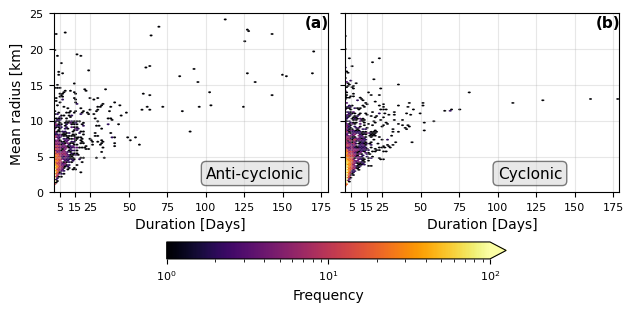

In [127]:
fig, (ax,ax2) = plt.subplots(1,2,sharex=True,sharey=True,
    figsize=(6.2217,3), layout='constrained'
)
hb = ax.hexbin(list(fixed_duration_max),list(fixed_radius_max),bins='log',cmap='inferno',vmax=100,vmin=1,edgecolors='face',linewidths=0.1)
cbar = fig.colorbar(hb,orientation='horizontal',ax=[ax,ax2],shrink=0.6,extend='max')
cbar.set_label('Frequency')
ax.set_xlabel('Duration [Days]')
ax.set_ylabel('Mean radius [km]')
ax.set_xlim(1,179)
ax.set_ylim(0,25)
ax.grid(alpha=0.3)

ax2.hexbin(list(fixed_duration_min),list(fixed_radius_min),bins='log',cmap='inferno',vmax=100,vmin=1,edgecolors='face',linewidths=0.1)
ax2.set_xlabel('Duration [Days]')
ax2.grid(alpha=0.3)

ax.annotate('(a)',xy=[164,23],fontweight='bold')
ax2.annotate('(b)',xy=[164,23],fontweight='bold')

ax.annotate('Anti-cyclonic',xy=[100,2],bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='lightgrey', alpha=0.5))
ax2.annotate('Cyclonic',xy=[100,2],bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='lightgrey', alpha=0.5))

ax.set_xticks([5,15,25,50,75,100,125,150,175])

fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyRadiusDuration_HB',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)


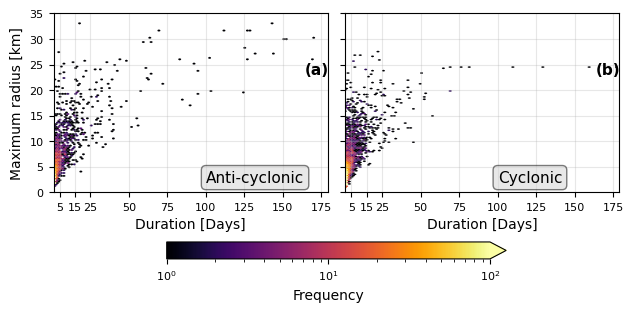

In [132]:
fig, (ax,ax2) = plt.subplots(1,2,sharex=True,sharey=True,
    figsize=(6.2217,3), layout='constrained'
)
hb = ax.hexbin(list(fixed_duration_max),list(fixed_maxRadius_max),bins='log',cmap='inferno',vmax=100,vmin=1,edgecolors='face',linewidths=0.1)
cbar = fig.colorbar(hb,orientation='horizontal',ax=[ax,ax2],shrink=0.6,extend='max')
cbar.set_label('Frequency')
ax.set_xlabel('Duration [Days]')
ax.set_ylabel('Maximum radius [km]')
ax.set_xlim(1,179)
ax.set_ylim(0,35)
ax.grid(alpha=0.3)

ax2.hexbin(list(fixed_duration_min),list(fixed_maxRadius_min),bins='log',cmap='inferno',vmax=100,vmin=1,edgecolors='face',linewidths=0.1)
ax2.set_xlabel('Duration [Days]')
ax2.grid(alpha=0.3)

ax.annotate('(a)',xy=[164,23],fontweight='bold')
ax2.annotate('(b)',xy=[164,23],fontweight='bold')

ax.annotate('Anti-cyclonic',xy=[100,2],bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='lightgrey', alpha=0.5))
ax2.annotate('Cyclonic',xy=[100,2],bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='lightgrey', alpha=0.5))

ax.set_xticks([5,15,25,50,75,100,125,150,175])

fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyRadiusDuration_HB_maxRadii',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

In [39]:
# from scipy import stats
# res = stats.pearsonr(fixed_duration,fixed_radius)
# print(res,'p < 0.01: ',res[1]<0.01)

/tmp/ipykernel_637408/2088708587.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,10000)


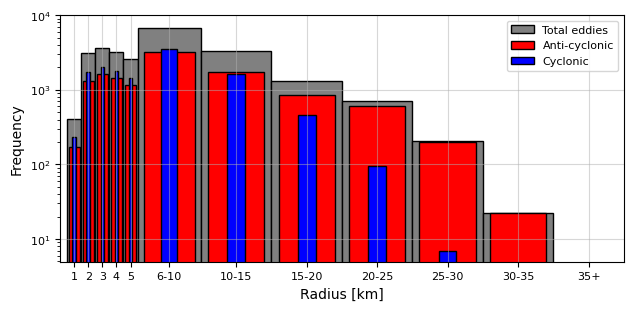

In [40]:
fig, ax = plt.subplots(
    figsize=(6.2217,3), layout = 'constrained'
)
ax.hist(radius_values_max + radius_values_min,log=True,edgecolor='k',bins=[0.5,1.5,2.5,3.5,4.5,5.5,10,15,20,25,30,35,40],range=(0.5, int(np.round(np.max([np.max(radius_values_max),np.max(radius_values_min)]),0))),color='grey',label='Total eddies')
ax.hist(radius_values_max,log=True,edgecolor='k',bins=[0.5,1.5,2.5,3.5,4.5,5.5,10,15,20,25,30,35,40],range=(0.5, int(np.round(np.max([np.max(radius_values_max),np.max(radius_values_min)]),0))),color='r',rwidth=0.8,label='Anti-cyclonic')
ax.hist(radius_values_min,log=True,edgecolor='k',bins=[0.5,1.5,2.5,3.5,4.5,5.5,10,15,20,25,30,35,40],range=(0.5, int(np.round(np.max([np.max(radius_values_max),np.max(radius_values_min)]),0))),color='b', rwidth=0.25,label='Cyclonic')
ax.set_ylim(0,10000)
ax.set_xticks([1,2,3,4,5,7.75,12.5,17.5,22.5,27.5,32.5,37.5])
ax.set_xticklabels([1,2,3,4,5,'6-10','10-15','15-20','20-25','25-30','30-35','35+'])
ax.set_xlim(0,40)
ax.grid(alpha=0.5)

ax.set_xlabel('Radius [km]')
ax.set_ylabel('Frequency')
ax.legend(loc='upper right')

fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyRadius',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

/tmp/ipykernel_637408/1404039124.py:57: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim(0,10000)


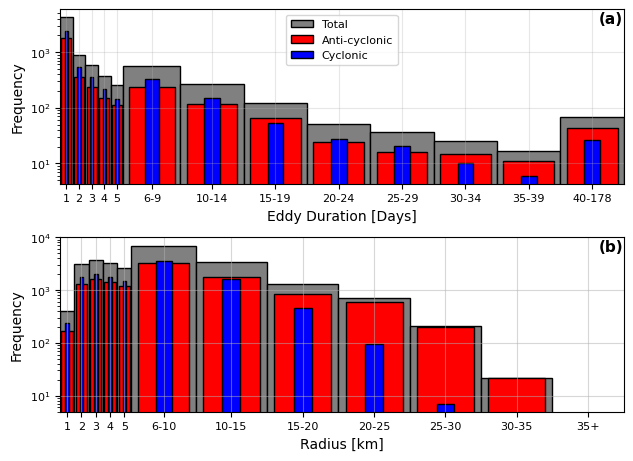

In [65]:
# Define bins
bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 10, 15, 20, 25, 30, 35, 40, 179]
positions = np.array([1, 2, 3, 4, 5, 7.75, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5])

# Calculate histograms manually
hist_total, _ = np.histogram(eddy_duration, bins)
hist_antic, _ = np.histogram(eddy_duration_max, bins)
hist_cyclo, _ = np.histogram(eddy_duration_min, bins)

# Create the figure and axis
fig, (ax,ax2) = plt.subplots(2,1,
    figsize=(6.2217, 4.5), layout='constrained')

widths = [1,1,1,1,1,4.5,5,5,5,5,5,5,5]

# Plot each bin in sorted order with dynamic width
for i in range(len(bins) - 1):
    heights = [hist_total[i], hist_antic[i], hist_cyclo[i]]
    colors = ['grey', 'red', 'blue']
    labels = ['Total', 'Anti-cyclonic', 'Cyclonic']
    
    # Sort bins by height within each bin range
    sorted_indices = np.argsort(heights)[::-1]
    
    # Plot bars for each category in sorted order within the same bin
    # for idx in sorted_indices:
    for idx in range(0,3):
        if labels[idx] == 'Total':
            ax.bar(positions[i], heights[idx], width=widths[i], color=colors[idx], edgecolor='k', label=labels[idx] if (i == 0 and labels[idx] not in ax.get_legend_handles_labels()[1]) else "")
        elif labels[idx] == 'Anti-cyclonic':
            ax.bar(positions[i], heights[idx], width=widths[i] * 0.8, color=colors[idx], edgecolor='k', label=labels[idx] if (i == 0 and labels[idx] not in ax.get_legend_handles_labels()[1]) else "")
        elif labels[idx] == 'Cyclonic':
            ax.bar(positions[i], heights[idx], width=widths[i] * 0.25, color=colors[idx], edgecolor='k', label=labels[idx] if (i == 0 and labels[idx] not in ax.get_legend_handles_labels()[1]) else "")



# Set log scale for y-axis
ax.set_yscale('log')

ax.set_xlim(0.5, 45)
ax.set_xlabel('Eddy Duration [Days]')
ax.grid(alpha=0.3)

# Set the custom positions and labels for x-ticks
ax.set_xticks([1,2,3,4,5,7.75,12.5,17.5,22.5,27.5,32.5,37.5,42.5])
ax.set_xticklabels([1, 2, 3, 4, 5, '6-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-178'])
ax.set_ylabel('Frequency')

# Add the legend
handles, labels = ax.get_legend_handles_labels()
unique_labels_with_handles = {label: handle for handle, label in zip(handles, labels)}
ax.legend(unique_labels_with_handles.values(), unique_labels_with_handles.keys(),loc='upper center')

ax2.hist(radius_values_max + radius_values_min,log=True,edgecolor='k',bins=[0.5,1.5,2.5,3.5,4.5,5.5,10,15,20,25,30,35,40],range=(0.5, int(np.round(np.max([np.max(radius_values_max),np.max(radius_values_min)]),0))),color='grey',label='Total eddies')
ax2.hist(radius_values_max,log=True,edgecolor='k',bins=[0.5,1.5,2.5,3.5,4.5,5.5,10,15,20,25,30,35,40],range=(0.5, int(np.round(np.max([np.max(radius_values_max),np.max(radius_values_min)]),0))),color='r',rwidth=0.8,label='Anti-cyclonic')
ax2.hist(radius_values_min,log=True,edgecolor='k',bins=[0.5,1.5,2.5,3.5,4.5,5.5,10,15,20,25,30,35,40],range=(0.5, int(np.round(np.max([np.max(radius_values_max),np.max(radius_values_min)]),0))),color='b', rwidth=0.25,label='Cyclonic')
ax2.set_ylim(0,10000)
ax2.set_xticks([1,2,3,4,5,7.75,12.5,17.5,22.5,27.5,32.5,37.5])
ax2.set_xticklabels([1,2,3,4,5,'6-10','10-15','15-20','20-25','25-30','30-35','35+'])
ax2.set_xlim(0.5,40)
ax2.grid(alpha=0.5)

ax2.set_xlabel('Radius [km]')
ax2.set_ylabel('Frequency')

ax.annotate('(a)',xy=[43,3300],fontweight='bold')
ax2.annotate('(b)',xy=[38.25,5500],fontweight='bold')

fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyRadiusDuration',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

# FWC and radius

In [42]:
FWC = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/FWC_full_domain.nc')['__xarray_dataarray_variable__'].sel(Y=slice(70,75)).sel(X=slice(-22,2))
FWC = FWC.resample(time='D').mean(dim='time')

In [43]:
radius_values_max_FW = []
for time in range(0,365):
    eddy = eddies_ID_max_t_surf.at[time,'ID']
    for ID in eddy:
        cond = eddy_ID_area[time].sel(X=slice(-16.5,0)) == ID
        if np.nanmean(FWC[time].where(cond)) >= 5:
            radius_ID = np.sqrt(Area_r.where(cond).sum() / np.pi)
            radius_values_max_FW.append(radius_ID.values/1000)

/tmp/ipykernel_637408/3888080925.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_637408/3888080925.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_637408/3888080925.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_637408/3888080925.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_637408/3888080925.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_637408/3888080925.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_637408/3888080925.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_637408/3888080925.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_637408/3888080925.py:6: R

In [44]:
radius_values_min_FW = []
for time in range(0,365):
    eddy = eddies_ID_min_t_surf.at[time,'ID']
    for ID in eddy:
        cond = eddy_ID_area[time].sel(X=slice(-16.5,0)) == ID
        if np.nanmean(FWC[time].where(cond)) >= 5:
            radius_ID = np.sqrt(Area_r.where(cond).sum() / np.pi)
            radius_values_min_FW.append(radius_ID.values/1000)

/tmp/ipykernel_637408/3763324039.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_637408/3763324039.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_637408/3763324039.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_637408/3763324039.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_637408/3763324039.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_637408/3763324039.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_637408/3763324039.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_637408/3763324039.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_637408/3763324039.py:6: R

/tmp/ipykernel_637408/1043508886.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,1000)


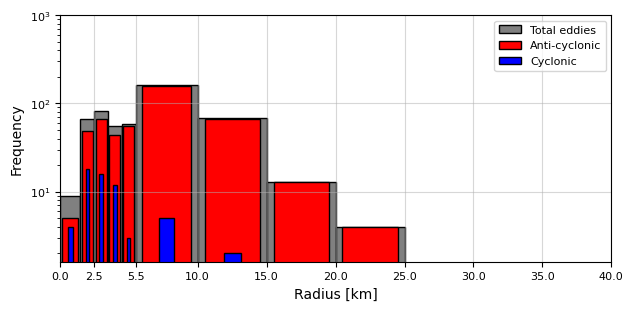

In [45]:
fig, ax = plt.subplots(
    figsize=(6.2217,3), layout = 'constrained'
)
ax.hist(radius_values_max_FW + radius_values_min_FW,log=True,edgecolor='k',bins=[0,1.5,2.5,3.5,4.5,5.5,10,15,20,25,30,35,40],color='grey',label='Total eddies')
ax.hist(radius_values_max_FW,log=True,edgecolor='k',bins=[0,1.5,2.5,3.5,4.5,5.5,10,15,20,25,30,35,40],color='r',rwidth=0.8,label='Anti-cyclonic')
ax.hist(radius_values_min_FW,log=True,edgecolor='k',bins=[0,1.5,2.5,3.5,4.5,5.5,10,15,20,25,30,35,40],color='b', rwidth=0.25,label='Cyclonic')
ax.set_ylim(0,1000)
ax.set_xticks([0,2.5,5.5,10,15,20,25,30,35,40])
ax.set_xlim(0,40)
ax.grid(alpha=0.5)

ax.set_xlabel('Radius [km]')
ax.set_ylabel('Frequency')
ax.legend(loc='upper right')

fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyRadiusFW',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)